<a href="https://colab.research.google.com/github/u6yuvi/Applied-Machine-Learning/blob/main/feature_selection/Feature-Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting the dataset

In [1]:
! mkdir ~/.kaggle

In [3]:
! cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install  kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           6226        196  1.0              
surajjha101/stores-area-and-sales-data                                Supermarket store branches sales analysis            10KB  2022-04-29 11:10:16           5502        159  1.0              
devansodariya/student-performance-data                                Student Performance Dataset                           7KB  2022-05-26 13:55:09           2485        115  0.9705882        
paradisejoy/top-hits-spotify-f

In [6]:
!kaggle competitions download -c santander-customer-satisfaction

 61% 5.00M/8.25M [00:00<00:00, 27.4MB/s]
100% 8.25M/8.25M [00:00<00:00, 42.6MB/s]


In [7]:
!ls

drive  sample_data  santander-customer-satisfaction.zip


In [8]:
!unzip -q santander-customer-satisfaction.zip

In [9]:
!ls

drive	     sample_submission.csv		  test.csv
sample_data  santander-customer-satisfaction.zip  train.csv


In [37]:
import numpy as np
import pandas as pd

In [71]:
!pip3 install pydotplus
!pip3 install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install probatus

In [70]:
import numpy as np
import pandas as pd
import scipy
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
!pip3 install yellowbrick==1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 8.3 MB/s 
     |████████████████████████████████| 14.8 MB 45.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 1.4
    Uninstalling yellowbrick-1.4:
      Successfully uninstalled yellowbrick-1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatibl

In [73]:
!pip3 install graphviz
!apt-get install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [74]:
from pydotplus import graph_from_dot_data
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [75]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, \
recall_score, precision_score, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score,\
cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold
pd.set_option('display.float_format',lambda x: '%.3f'%x)

In [16]:
data = pd.read_csv("train.csv")
data.shape

(76020, 371)

In [14]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [52]:
X = data.drop("TARGET",axis=1)

In [36]:
Y = data.TARGET

### Check for Imbalanced Dataset

Dataset is highly imbalanced

In [39]:
np.bincount(Y)/len(Y)

array([0.96043147, 0.03956853])

## Univariate Feature Selection

### Variance Threshold

Removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

s an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by


Let's remove the features that have the same value in all samples i.e with zero variance and keep features with non zero variance

In [17]:
from sklearn.feature_selection import VarianceThreshold

In [23]:
len(X.columns)

370

In [44]:
sel = VarianceThreshold()
sel.fit(X)

VarianceThreshold()

In [45]:
len(sel.get_feature_names_out())

336

In [48]:
feats_with_zero_var = X.columns[~sel.get_support()]
feats_with_zero_var

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3',
       'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

We can check for one feature by counting the unique values.

In [58]:
X['ind_var2_0'].value_counts()

0    76020
Name: ind_var2_0, dtype: int64

In [66]:
print(f'Percentage of 0\'s {(X["ind_var2_0"].value_counts()/len(X)*100).values}')

Percentage of 0's [100.]


We can check for all the features with zero variance

In [59]:
X[feats_with_zero_var].value_counts().to_frame()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
ind_var2_0,ind_var2,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var41,ind_var46_0,ind_var46,num_var27_0,num_var28_0,num_var28,num_var27,num_var41,num_var46_0,num_var46,saldo_var28,saldo_var27,saldo_var41,saldo_var46,imp_amort_var18_hace3,imp_amort_var34_hace3,imp_reemb_var13_hace3,imp_reemb_var33_hace3,imp_trasp_var17_out_hace3,imp_trasp_var33_out_hace3,num_var2_0_ult1,num_var2_ult1,num_reemb_var13_hace3,num_reemb_var33_hace3,num_trasp_var17_out_hace3,num_trasp_var33_out_hace3,saldo_var2_ult1,saldo_medio_var13_medio_hace3,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76020


In [50]:
X = X.drop(feats_with_zero_var,axis=1)
X.shape

(76020, 336)

Reduced the feature set from 370 to 336.


In [67]:
from sklearn.feature_selection import GenericUnivariateSelect, f_classif, mutual_info_classif

In [91]:
def GenericUnivariateSelect_(score_fnc, X,y):
    selector = GenericUnivariateSelect(f_classif)
    selector.fit(X,y)
    scores = -np.log10(selector.pvalues_)
    scores /= scores.max()
    #-Log(p-score)
    univariate_cols = list(zip(X.columns,selector.pvalues_))
    uni_df = pd.DataFrame(univariate_cols,columns = ['f_names','neg_log_pvalue']).sort_values(by = 'neg_log_pvalue',ascending=False)
    uni_df.plot('f_names', 'neg_log_pvalue', 'barh', figsize=(12,X.shape[1]/4.2), legend=False)
    return uni_df

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


,f_names,neg_log_pvalue
3,imp_ent_var16_ult1,0.996
149,num_var37_med_ult2,0.994
123,num_op_var40_ult3,0.974
271,num_var7_recib_ult1,0.936
356,saldo_medio_var17_ult3,0.928
142,num_var32_0,0.926
143,num_var32,0.926
7,imp_op_var40_comer_ult3,0.921
69,ind_var32,0.890
68,ind_var32_0,0.890


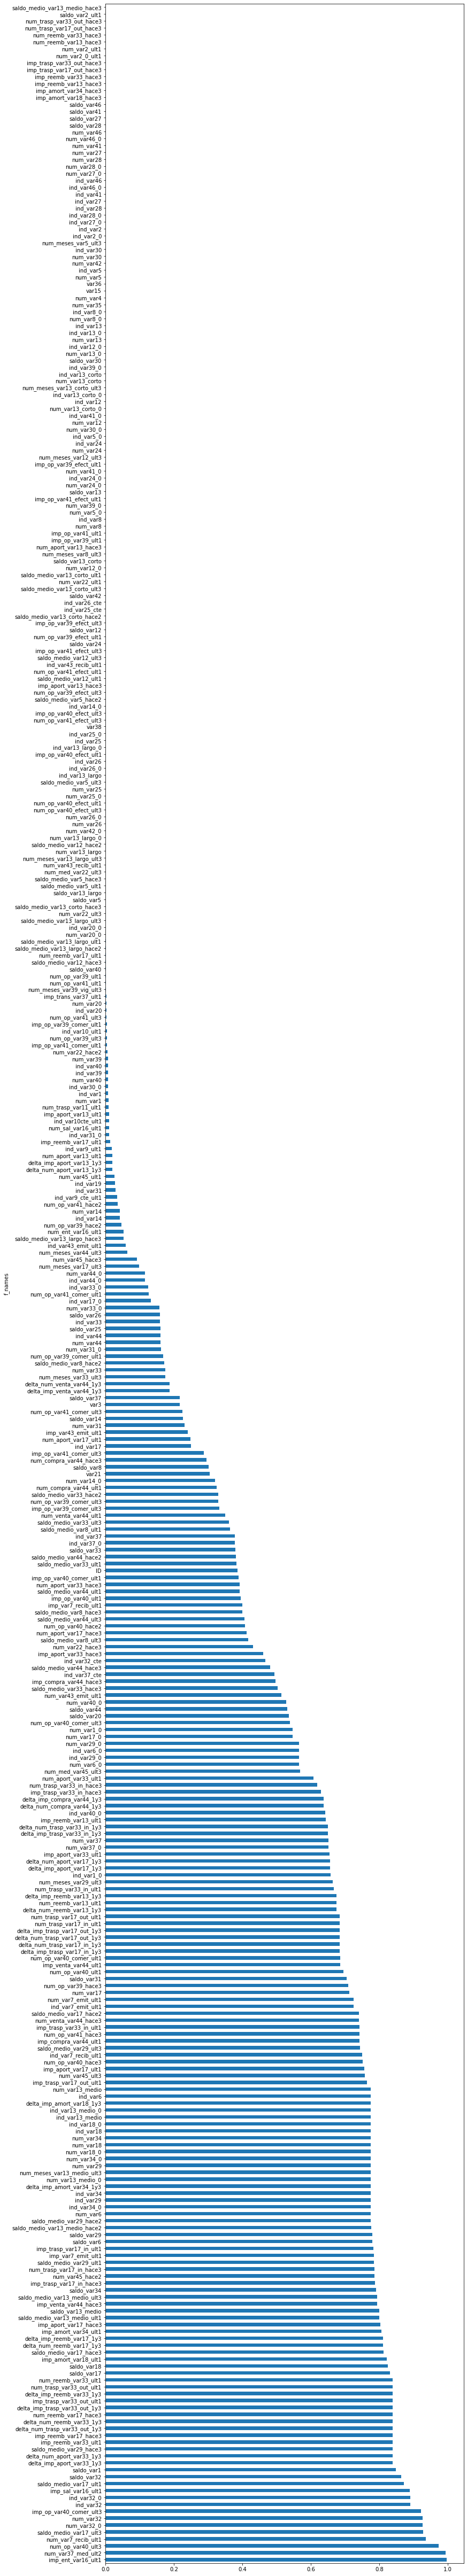

In [92]:
scores = GenericUnivariateSelect_(f_classif,X,Y)
scores[:10]

#### Tree Model Rules

In [77]:
np.random.seed(123)
tree=DecisionTreeClassifier(class_weight='balanced',max_depth=3)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [79]:
dot_data = export_graphviz(tree,filled = True,rounded = True,
                          class_names = ["0", "1"],
                          feature_names = X.columns,
                          out_file  =None)

In [80]:
graph = graph_from_dot_data(dot_data)

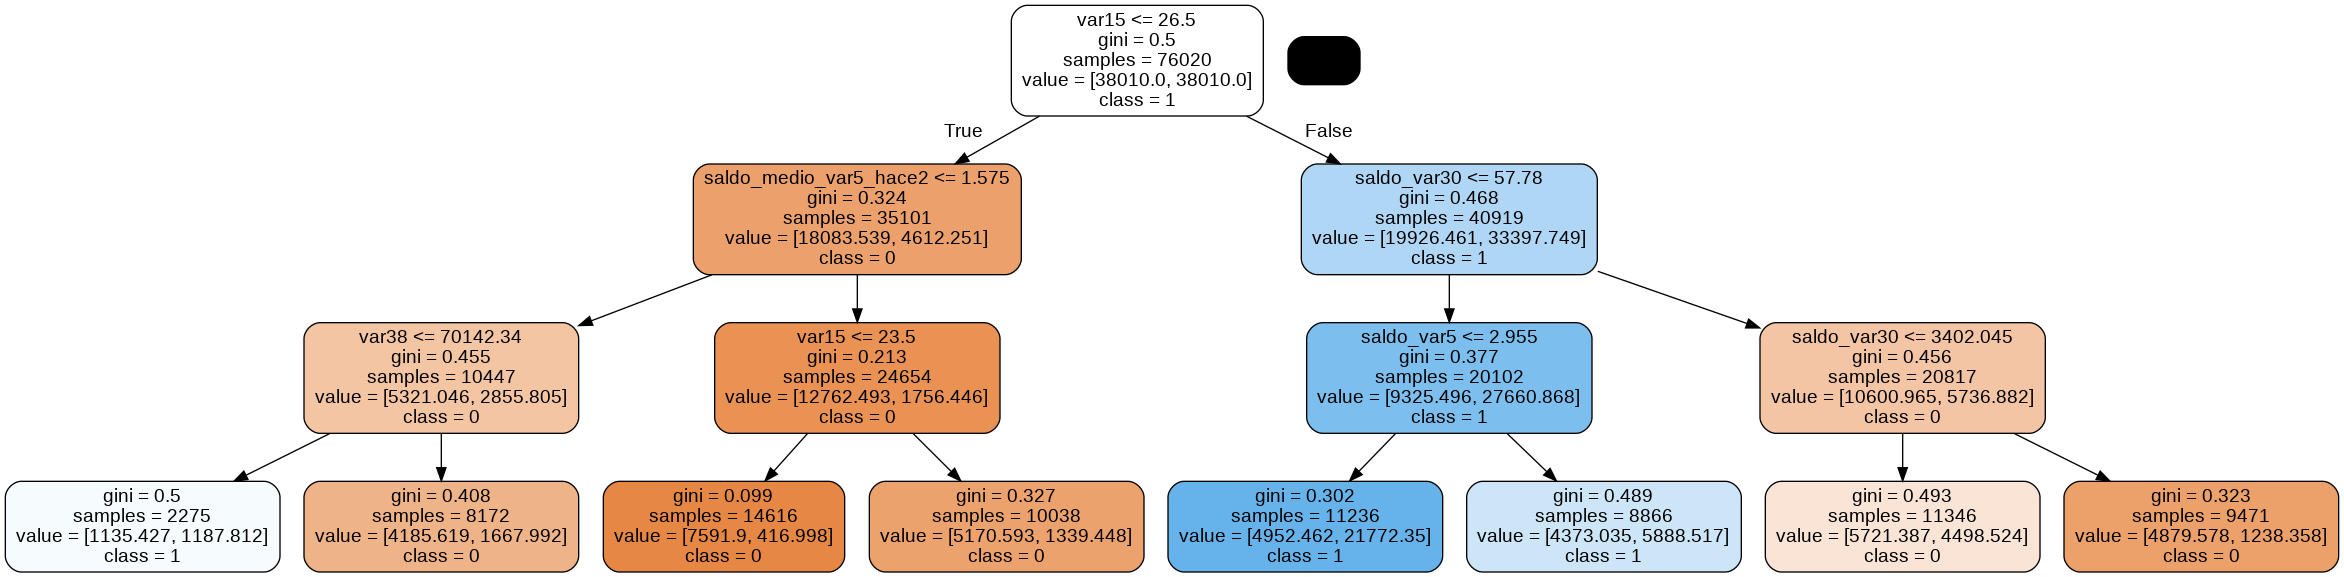

In [85]:
graph.write_png('tree.png')
from IPython.display import Image
Image('tree.png',height =800,width = 2000)

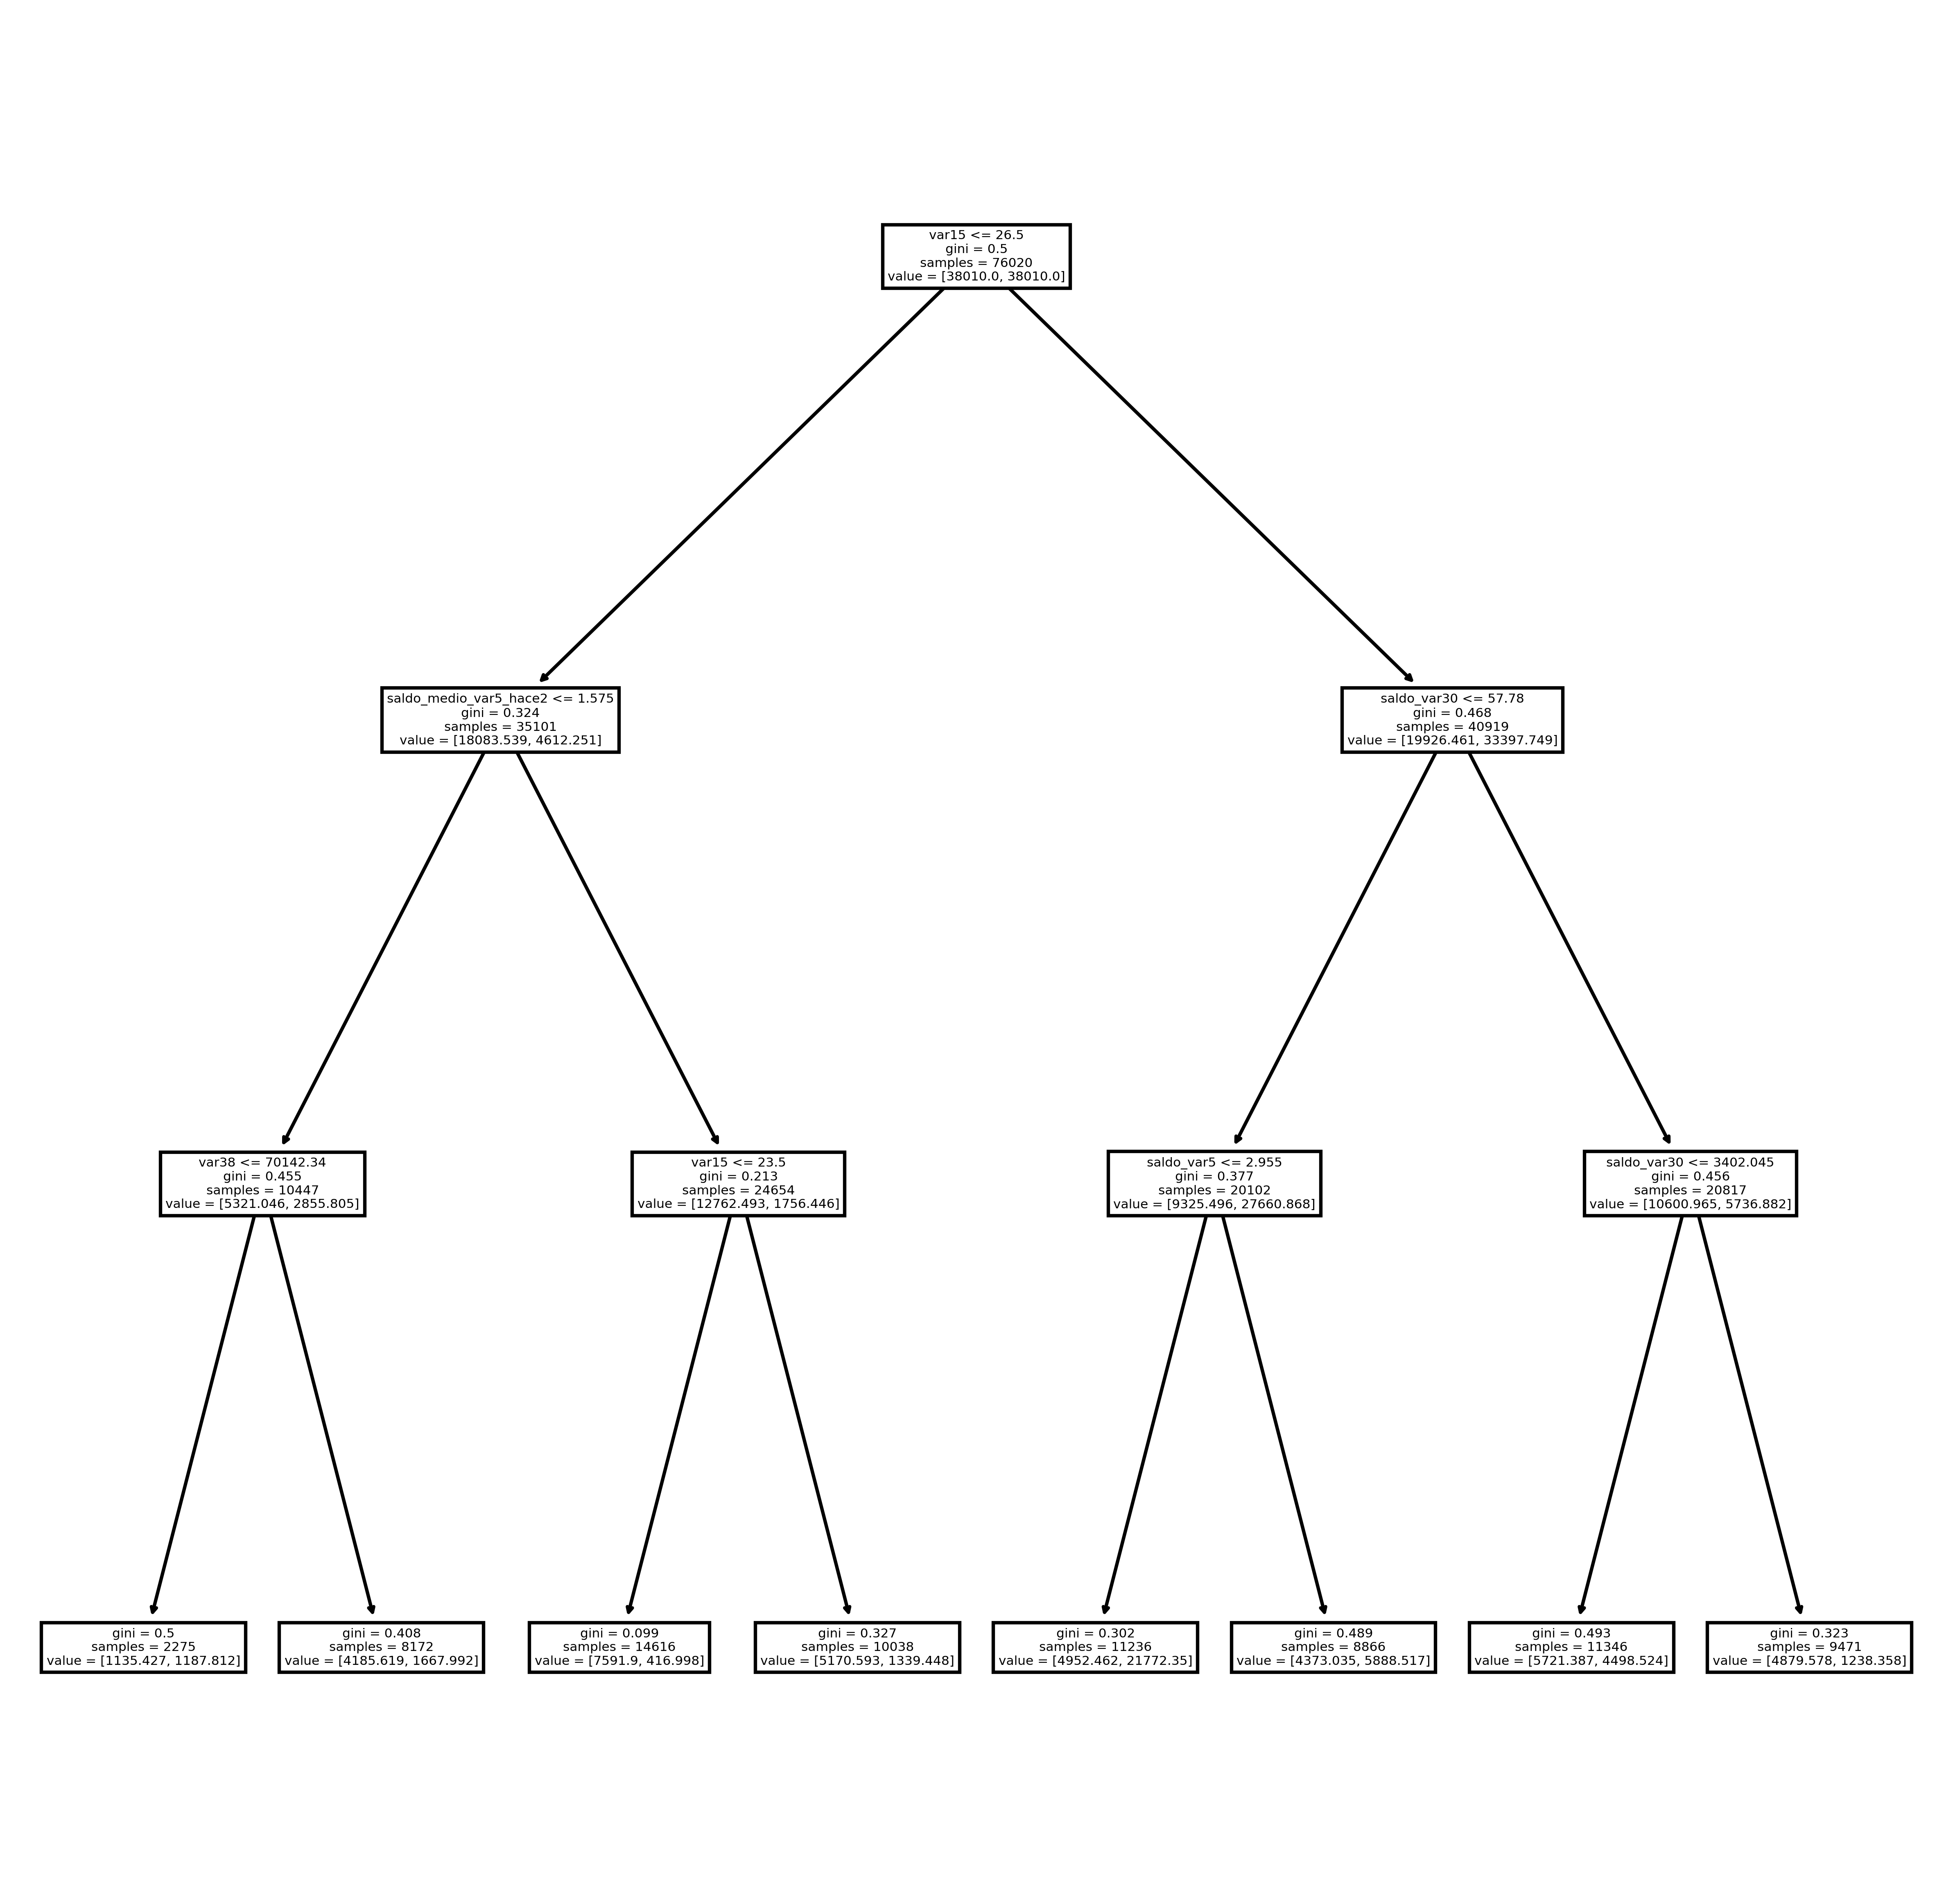

In [86]:
plt.figure(figsize=(10, 10), dpi=600)
tree_dot = plot_tree(tree, feature_names=X.columns)

In [88]:
scorer_f1 = make_scorer(f1_score, greater_is_better=True)
scorer_auc = make_scorer(roc_auc_score, greater_is_better=True)
scorer_avg_precision = make_scorer(average_precision_score, greater_is_better=True)
scorer_precision = make_scorer(precision_score, greater_is_better=True)
scorer_recall = make_scorer(recall_score, greater_is_better=True)

In [89]:
score = {'f1' :scorer_f1,
        'auc' :scorer_auc,
        'avg_prec' : scorer_avg_precision,
        'recall' : scorer_recall,
        'precision': scorer_precision}

In [90]:
np.random.seed(123)
model = RandomForestClassifier(n_estimators = 100,class_weight='balanced',
                               min_samples_leaf=3,
                              criterion ='gini')
# 10 fold cross validation
cv_score = cross_validate(model, 
                           X,
                           Y,
                           cv = StratifiedKFold(10,shuffle=True,random_state=123),
                            scoring =score)

In [93]:
pd.DataFrame(cv_score)

,fit_time,score_time,test_f1,test_auc,test_avg_prec,test_recall,test_precision
0,16.795,0.247,0.246,0.725,0.107,0.577,0.157
1,22.380,0.286,0.234,0.703,0.098,0.530,0.150
2,17.444,0.188,0.232,0.703,0.097,0.532,0.148
3,16.632,0.186,0.255,0.717,0.109,0.548,0.166
4,16.540,0.185,0.247,0.716,0.106,0.551,0.159
5,16.558,0.185,0.228,0.690,0.094,0.498,0.148
6,18.578,0.185,0.252,0.725,0.110,0.571,0.162
7,19.751,0.192,0.234,0.710,0.099,0.551,0.148
8,19.497,0.193,0.218,0.693,0.091,0.518,0.138
9,18.151,0.189,0.227,0.694,0.094,0.512,0.146


In [94]:
model.fit(X,Y)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=3)

#### Random Forest Model Importance

In [95]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'features':df.columns, 'importance':m.feature_importances_}).sort_values('importance', ascending=False)

In [96]:
#Feature Importance
fi=rf_feat_importance(model,X);fi[:30]

,features,importance
2,var15,0.163
183,saldo_var30,0.049
369,var38,0.047
332,saldo_medio_var5_ult3,0.044
331,saldo_medio_var5_ult1,0.038
191,saldo_var42,0.038
0,ID,0.036
329,saldo_medio_var5_hace2,0.035
330,saldo_medio_var5_hace3,0.034
165,saldo_var5,0.031


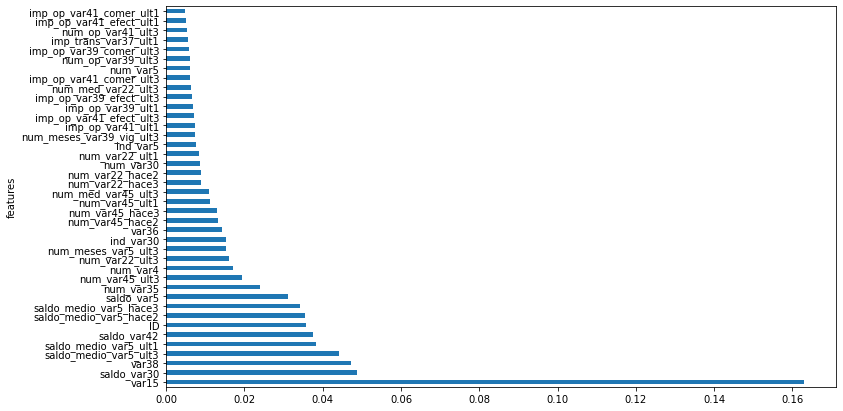

In [97]:
def plot_fi(fi): return fi.plot('features', 'importance', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:40]);

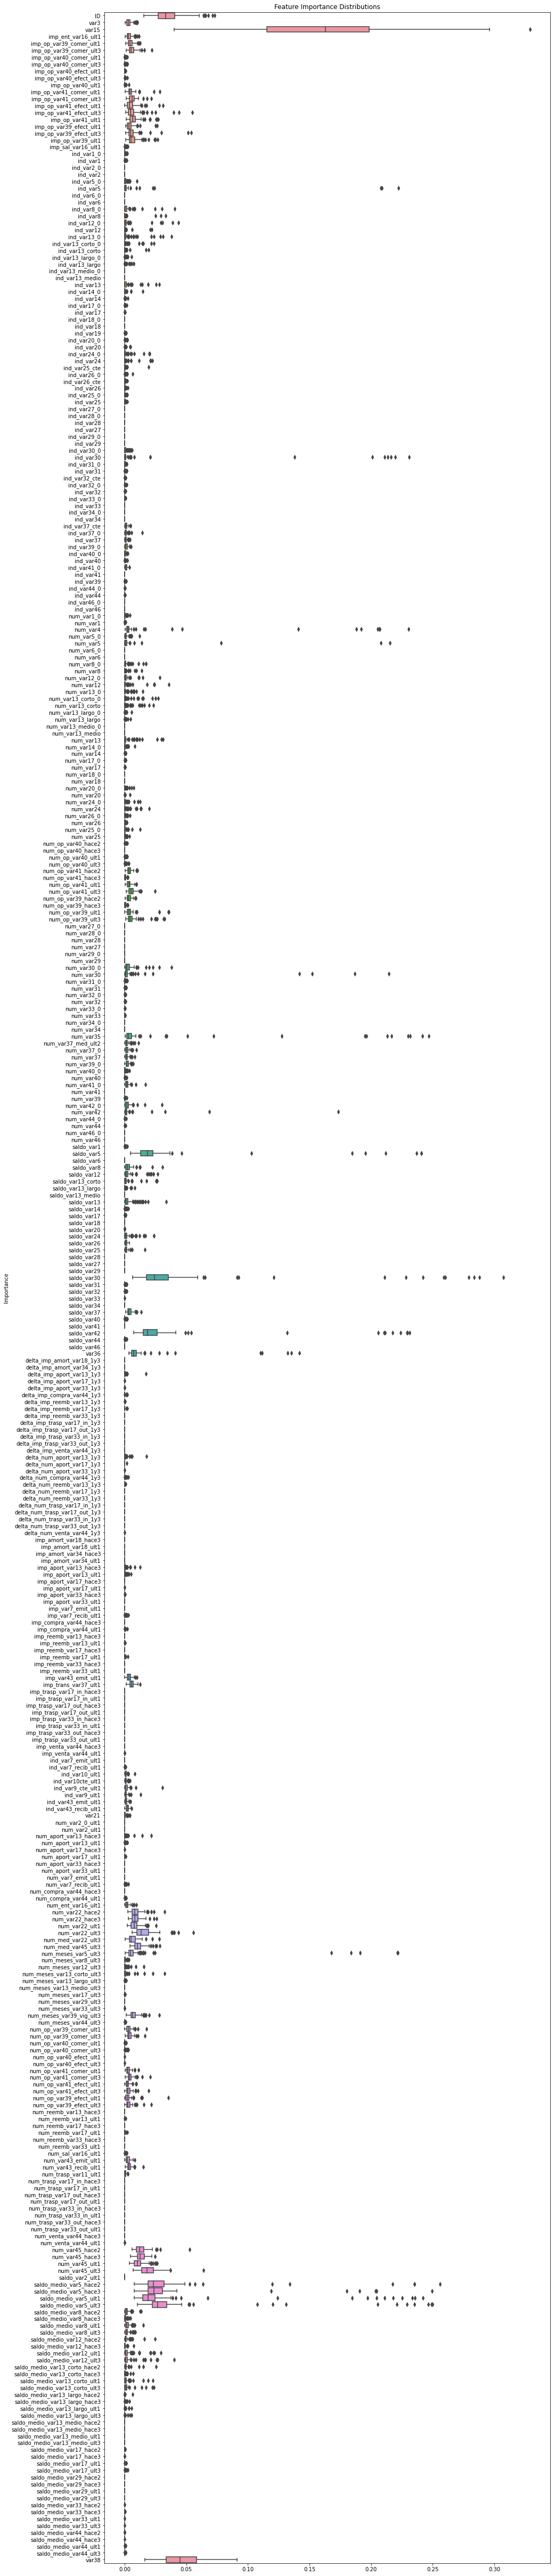

In [99]:
# get the feature importances from each tree and then visualize the
# distributions as boxplots
plt.figure(figsize=(15,X.shape[1]/4.2))
all_feat_imp_df = pd.DataFrame(data=[tree.feature_importances_ for tree in 
                                     model],
                               columns=X.columns)

(sns.boxplot(data=all_feat_imp_df,orient="h")
        .set(title='Feature Importance Distributions',
             ylabel='Importance'));

### Split Dataset

In [100]:
def get_split_info(X,Y,n_splits=5,test_size=0.2,random_state=123):
    
    sss = StratifiedKFold(n_splits =10)

#     sss = StratifiedShuffleSplit(n_splits=n_splits,
#                                  test_size=test_size,
#                                  random_state=random_state)
    sss.get_n_splits(X, Y)
    dataset_info = dict()
    for i, indexes in enumerate(sss.split(X, Y)):
        print("TRAIN:", len(indexes[0]), "TEST:", len(indexes[1]))
        dataset_info[str(i)] = {'train':indexes[0],'test': indexes[1]}
        #X_train, X_test = X.iloc[indexes[0],:], X.iloc[indexes[1],:]
        #y_train, y_test = Y[indexes[0]], Y[indexes[1]]
    return dataset_info

In [101]:
dataset_info = get_split_info(X,Y.values)

TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602


In [109]:
def generate_dist_plots(X =X ,dataset = None, f_name = None,label_name = None):
    #  Numerical or Categorical Data
    a = 10  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter
    fig = plt.figure(figsize=(15,8))
    sns.histplot(x = X[f_name],
             multiple = 'stack',
             hue = X[label_name]).set(title = f'{f_name} Distribution before splitting (n = {X.shape[0]}))');
    fig = plt.figure(figsize=(30,42))
    for i in range(0,len(dataset.keys())): # no of folds in split
        for index, j in enumerate(list(dataset[str(i)].keys())): # no of data subsets
            #print(f'fold {i}, dataset {j},index {index}')
            ax = plt.subplot(a, 2, c)
            data = X.iloc[dataset_info[str(i)][j],:]
            sns.histplot(data = data, x = f_name,
                 multiple = 'stack',
                 hue = label_name,ax = ax).set(title = f'Fold {i} {j} Dsitribution (n = {data.shape[0]})');
            c=c+1

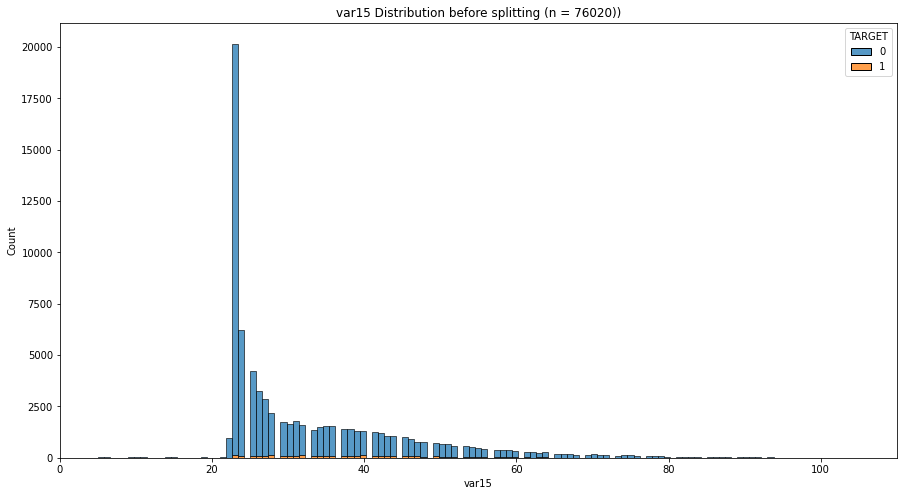

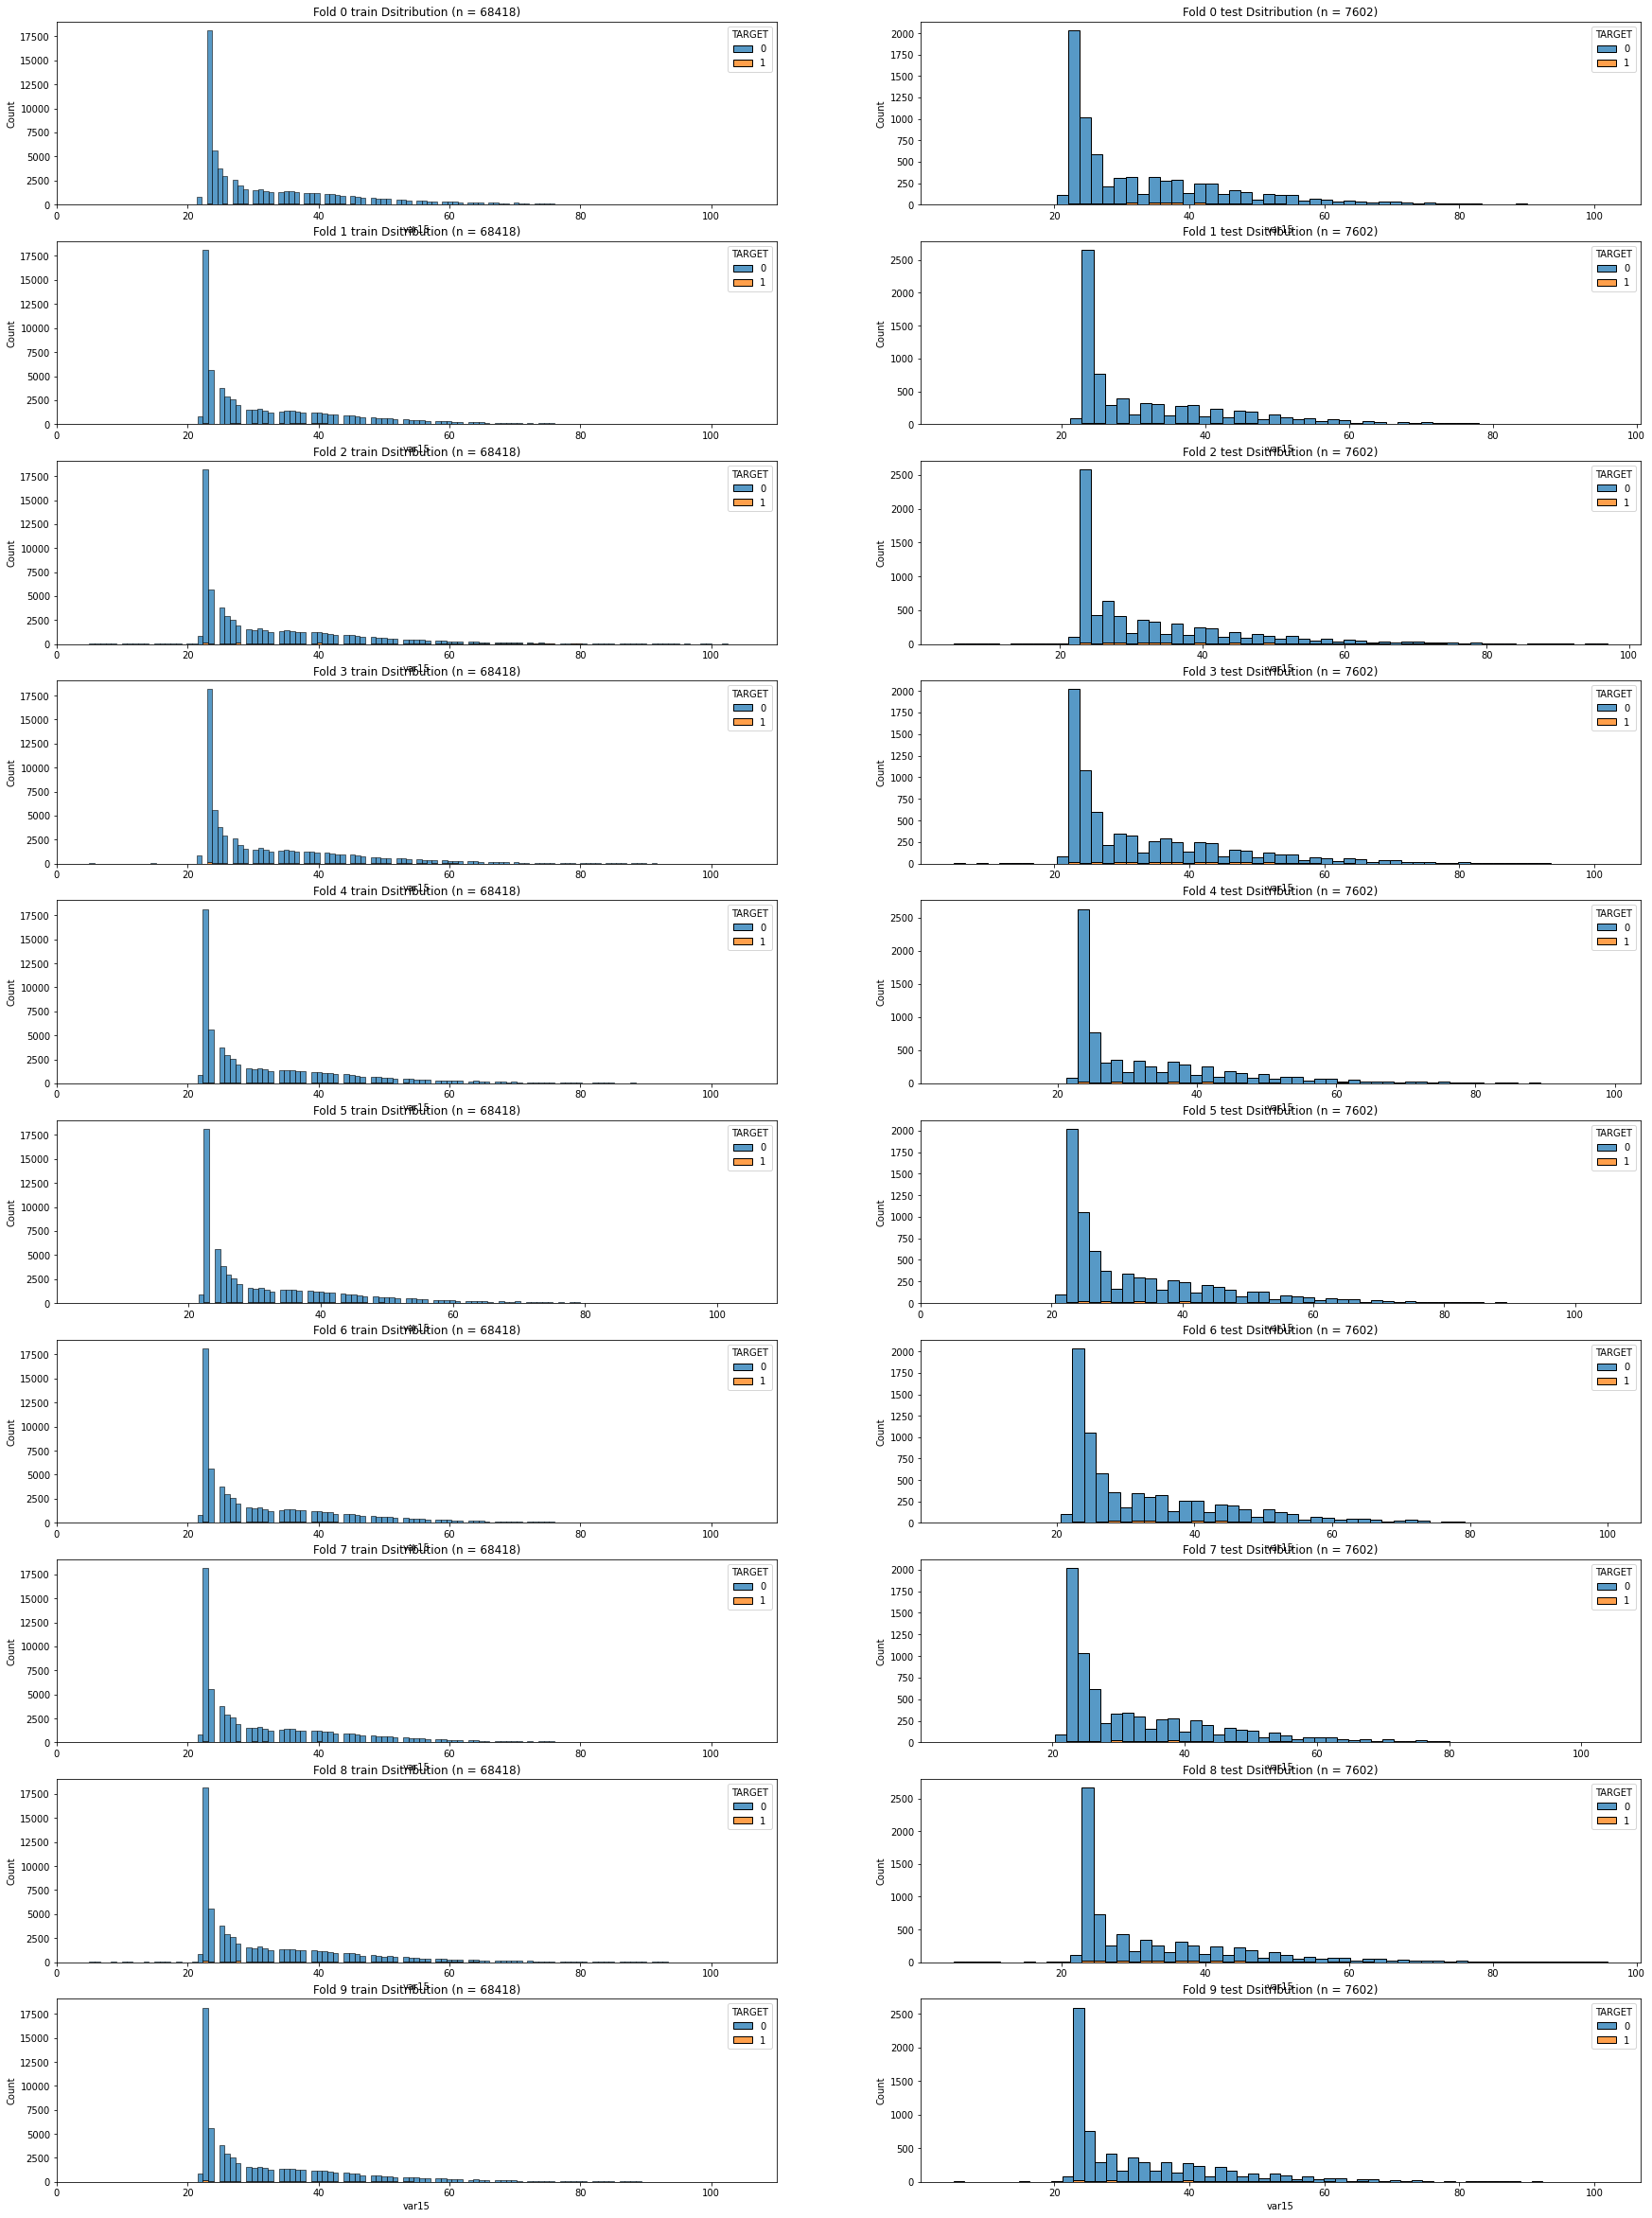

In [110]:
generate_dist_plots(X = data[X.columns.tolist() + ['TARGET']],dataset = dataset_info,f_name = "var15",label_name = "TARGET")

### Permutation Importance

In [111]:
def cal_p_importance(dataset_info,X,Y, model , scoring):
    results = []
    print(f'No of feats: {X.shape[1]}')
    for key, value in dataset_info.items():
        print("TRAIN:", len(value['train']), "TEST:", len(value['test']))
        #dataset_info[str(i)] = {'train':indexes[0],'test': indexes[1]}
        X_train, X_test = X.iloc[value['train'],:], X.iloc[value['test'],:]
        y_train, y_test = Y[value['train']], Y[value['test']]
        model.fit(X_train,y_train)
        tmp = permutation_importance(model,X_test ,
                                          y_test,
                                          scoring=scoring)
        results.append(tmp)
    return results

In [112]:
#results = cal_p_importance(dataset_info,X,Y, model ,scorer_f1)

No of feats: 370
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602
TRAIN: 68418 TEST: 7602


In [113]:
def p_imp_over_folds(results,feat):
    df_result = pd.DataFrame()
    for i in range(0,len(results)):
        #print(i)
        df_p = pd.DataFrame({key: value for key , value in results[i].items() if key != 'importances'})
        df_p["fold"] = i+1
        df_result = pd.concat([df_p,df_result])
    idx_feat_map = {i:feat[i] for i in range(0,len(feat))}
    df_result['f_name'] = df_result.reset_index().rename(columns = {'index':'f_name'})['f_name'].map(idx_feat_map)
    df_result_agg = df_result.groupby(['f_name']).agg(np.mean).reset_index()
    df_result_agg['fold'] = 99
    df_result_agg = pd.concat([df_result.reset_index(drop=True),df_result_agg.reset_index(drop=True)],axis=0)
    return df_result_agg

In [114]:
def plot_p_imp_per_fold_results(p_imp_df,X):
    no_folds = p_imp_df.fold.nunique()
    a = no_folds
    #  Categorical Data
    a = no_folds  # number of rows
    b = 1  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=(60,no_folds*8))

    for i in sorted(p_imp_df.fold.unique()):
        plt.subplot(a, b, c)
        plt.title(f'CV Result for Fold:{i}')
        plt.xticks(np.arange(len(X.columns)),list(X.columns),rotation = 90)
        #ax.set_xticklabels(list(X.columns))
        plt.bar(np.arange(len(X.columns)),
           p_imp_df.query(f'fold == {i}')["importances_mean"].values,
          yerr= p_imp_df.query(f'fold == {i}')["importances_std"].values,
          align = 'center',alpha = 0.5, ecolor= 'black',capsize = 10,orientation = u'vertical')
        plt.grid()
        plt.margins(0.05)
        plt.tight_layout(pad=5)
      # Tweak spacing to prevent clipping of tick-labels
        #plt.subplots_adjust(hspace = 1.5)
        #ax.yaxis.grid(True)
        #sns.countplot(df[i])
        c = c + 1
    #plt.show()
    return fig
    

In [115]:
def permutation_importance_(dataset_info,X,y,model,scorer):
    results = cal_p_importance(dataset_info,X,y, model ,scorer)
    df_results = p_imp_over_folds(results,X.columns)
    fig = plot_p_imp_per_fold_results(df_results,X)
    return df_results, fig

In [116]:
permutation_importance_(dataset_info,X,Y,model,scorer_avg_precision)

No of feats: 370
TRAIN: 68418 TEST: 7602


KeyboardInterrupt: ignored

### Mean Threshold

In [117]:
from sklearn.feature_selection import SelectFromModel

In [118]:
rf_select_mean = SelectFromModel(model).fit(X,Y)
print(rf_select_mean.threshold_)
cols = X.columns
rf_cols_to_keep_mean = rf_select_mean.get_support()
rf_cols_to_keep_mean = cols[rf_cols_to_keep_mean]
rf_cols_to_keep_mean = list(rf_cols_to_keep_mean) 
print(f'Features Dropped: \n {set(X.columns).difference(set(rf_cols_to_keep_mean))}\n')
print(f'Features Selected[{len(rf_cols_to_keep_mean)}]:\n {rf_cols_to_keep_mean}\n')

0.002702702702702703
Features Dropped: 
 {'num_var32_0', 'saldo_var26', 'saldo_var33', 'var21', 'saldo_var17', 'ind_var6', 'num_var27_0', 'ind_var40_0', 'num_op_var40_ult1', 'saldo_medio_var33_ult3', 'ind_var10_ult1', 'ind_var13_medio', 'delta_num_reemb_var13_1y3', 'imp_trasp_var17_out_hace3', 'ind_var5_0', 'num_var13_0', 'num_var37', 'saldo_var32', 'num_op_var40_hace3', 'ind_var43_emit_ult1', 'ind_var32_0', 'num_var13', 'delta_num_reemb_var17_1y3', 'delta_imp_trasp_var33_out_1y3', 'saldo_medio_var44_hace2', 'saldo_medio_var8_hace3', 'imp_aport_var33_hace3', 'num_sal_var16_ult1', 'saldo_var46', 'saldo_var44', 'saldo_var41', 'ind_var12_0', 'num_var28', 'delta_imp_trasp_var17_in_1y3', 'saldo_var24', 'imp_trasp_var33_out_ult1', 'num_var7_emit_ult1', 'delta_num_trasp_var17_in_1y3', 'num_var13_largo', 'delta_num_trasp_var33_in_1y3', 'saldo_medio_var29_ult1', 'num_op_var40_ult3', 'saldo_medio_var12_ult3', 'num_var40_0', 'imp_reemb_var13_ult1', 'ind_var32_cte', 'num_var13_largo_0', 'num_var5_

### Feature Importance Threshold

In [119]:
rf_select_thresh = SelectFromModel(model,threshold=0.005).fit(X,Y)
print(rf_select_thresh.threshold_)
cols = X.columns
rf_cols_to_keep_thresh = rf_select_thresh.get_support()
rf_cols_to_keep_thresh = cols[rf_cols_to_keep_thresh]
rf_cols_to_keep_thresh = list(rf_cols_to_keep_thresh)
print(f'Features Dropped: \n {set(X.columns).difference(set(rf_cols_to_keep_thresh))}\n')
print(f'Features Selected[{len(rf_cols_to_keep_thresh)}]:\n {rf_cols_to_keep_thresh}\n')

0.005
Features Dropped: 
 {'num_var32_0', 'saldo_var26', 'saldo_var33', 'var21', 'saldo_var17', 'ind_var6', 'num_var27_0', 'ind_var40_0', 'num_op_var40_ult1', 'saldo_medio_var33_ult3', 'ind_var10_ult1', 'ind_var13_medio', 'delta_num_reemb_var13_1y3', 'imp_trasp_var17_out_hace3', 'num_op_var41_comer_ult3', 'ind_var5_0', 'num_var13_0', 'num_var37', 'saldo_var32', 'num_op_var40_hace3', 'ind_var43_emit_ult1', 'ind_var32_0', 'num_var13', 'delta_num_reemb_var17_1y3', 'delta_imp_trasp_var33_out_1y3', 'saldo_medio_var44_hace2', 'saldo_medio_var8_hace3', 'imp_aport_var33_hace3', 'num_sal_var16_ult1', 'saldo_var46', 'saldo_var44', 'num_op_var39_comer_ult1', 'saldo_var41', 'ind_var12_0', 'num_var28', 'delta_imp_trasp_var17_in_1y3', 'saldo_var24', 'imp_trasp_var33_out_ult1', 'var3', 'num_var7_emit_ult1', 'delta_num_trasp_var17_in_1y3', 'num_var13_largo', 'delta_num_trasp_var33_in_1y3', 'saldo_medio_var29_ult1', 'imp_var43_emit_ult1', 'num_op_var40_ult3', 'saldo_medio_var12_ult3', 'num_var40_0', 'i

## RFECV

In [120]:
from sklearn.feature_selection import RFECV

In [121]:
def RFECV_(rfcev_obj,X,Y,scorer_name = None,rs = 123):
    np.random.seed(rs)
    rfcev_obj.fit(X,Y)
    plt.plot(rfcev_obj.grid_scores_);
    plt.xlabel('Number of Features'); plt.ylabel(f'{scorer_name}'); plt.title('Feature Selection Scores');
    sel_cols = X.columns[rfcev_obj.support_]
    ranking_cols = sorted(list(zip(rfcev_obj.ranking_,X.columns)),key = lambda x: x[0])
    print(sel_cols)
    print(len(sel_cols))
    return sel_cols, ranking_cols

In [122]:
# Create a model for feature selection
estimator = RandomForestClassifier(random_state = 10,
                                   n_estimators = 100,
                                   n_jobs = -1,
                                   oob_score=True,
                                   criterion='gini',
                                   max_features=0.8,
                                   class_weight='balanced')

# Create the object
selector_avg_precision = RFECV(estimator, step = 1, cv = StratifiedKFold(10), scoring = scorer_avg_precision, n_jobs = -1)

In [ ]:
_,_ = RFECV_(selector_avg_precision,
                X,
                Y,
                'Avg-Precision Score')

## RFECV using Multiple Models

In [ ]:
# # explore the algorithm wrapped by RFE
# from numpy import mean
# from numpy import std
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Perceptron
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

In [ ]:
# # get a list of models to evaluate
# def get_models():
#     models = dict()
#     # lr
#     rfe = RFECV(estimator=LogisticRegression(class_weight = 'balanced'),
#                 step = 1,
#                cv = StratifiedKFold(10),
#                scoring = scorer_f1)
    
#     models['lr'] = Pipeline(steps=[('std', StandardScaler()),('lr',rfe)])
    
    
#     rfe = RFECV(estimator=Perceptron(class_weight = 'balanced'),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
    
#     models['perc'] = Pipeline(steps=[('min-max', MinMaxScaler()),('perc',rfe)])
    
#     # cart
#     rfe = RFECV(estimator=DecisionTreeClassifier(class_weight = 'balanced'),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
#     models['tree'] = Pipeline(steps=[('tree',rfe)])
    
    
#     # rf
#     rfe = RFECV(estimator=RandomForestClassifier(class_weight = 'balanced',criterion ='entropy'),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
#     models['rf'] = Pipeline(steps=[('rf',rfe)])
    
#     # gbm
#     rfe = RFECV(estimator=GradientBoostingClassifier(),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
#     models['gbm'] = Pipeline(steps=[('gbm',rfe)])
#     return models

In [ ]:
# def RFECV_pipe_(rfcev_obj,model_name,X,Y,scorer_name = None,rs = 123):
#     np.random.seed(rs)
#     rfcev_obj.fit(X,Y)
#     fig , ax = plt.subplots(figsize = (12,8))
#     ax.plot(rfcev_obj[model_name].grid_scores_);
#     ax.set_xlabel('Number of Features'); ax.set_ylabel(f'{scorer_name}'); ax.set_title(f'RFECV-{model_name}');
#     sel_cols = X.columns[rfcev_obj[model_name].support_]
#     ranking_cols = sorted(list(zip(rfcev_obj[model_name].ranking_,X.columns)),key = lambda x: x[0])
#     print(sel_cols)
#     print(len(sel_cols))
#     return sel_cols, ranking_cols, fig

In [ ]:
# models = get_models()
# for model_name, obj in models.items():
#     sel_cols, ranking_cols, fig = RFECV_pipe_(obj,model_name,X,Y,"F1-score")
#     rank_df = pd.DataFrame(ranking_cols,columns = ['rank','f_name'])

## RFECV using D-Tree Models

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFECV(estimator=LogisticRegression(class_weight = 'balanced'),
                step = 1,
               cv = StratifiedKFold(10),
               scoring = scorer_f1)
    
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['lr_tree'] = Pipeline(steps=[('std', StandardScaler()),('s',rfe),('m',model)])
    
    # perceptron
    rfe = RFECV(estimator=Perceptron(class_weight = 'balanced'),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['per_tree'] = Pipeline(steps=[('min-max', MinMaxScaler()),('s',rfe),('m',model)])
    
    # cart
    rfe = RFECV(estimator=DecisionTreeClassifier(class_weight = 'balanced'),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['tree_tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    
    # rf
    rfe = RFECV(estimator=RandomForestClassifier(class_weight = 'balanced',criterion ='entropy'),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['rf_tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # gbm
    rfe = RFECV(estimator=GradientBoostingClassifier(),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['gbm_tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y,scoring = 'accuracy'):
    cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1,return_estimator = True)
    return scores

In [ ]:
def rfecv_comparision(models,X,y,score):
    results, names = list(), list()
    scores = dict()
    for name, model in models.items():
        results = evaluate_model(model, X,Y,score)
        results_score = {key:values for key,values in results.items() if key.startswith('test')}
        scores[name] = results_score

    #no_metrics = [len(val) for val in scores.values()][0]
    metric_names = list([val.keys() for val in scores.values()][0])


    plot_scores = list()
    model_names = scores.keys()
    for i in metric_names:
        sc = []
        sc = [values[i] for key, values in scores.items()]
        plot_scores.append(sc)
    return plot_scores,metric_names,model_names
    

In [ ]:
def create_rfecv_df(plot_scores,metric_names,model_names):
    df = pd.DataFrame()
    for index,i in enumerate(plot_scores):
        #print(i)
        temp = pd.DataFrame(i)
        temp['metric'] = metric_names[index]
        temp['model'] = model_names
        df = pd.concat([df,temp])
    return df

In [ ]:
def rfecv_plot(plot_scores,model_names,metric_names):

    a = len(plot_scores)  # number of rows
    b = 1  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=(10,22))
    for i in range(0,len(plot_scores)): # no of folds in split

        ax = plt.subplot(a, 1, c)
        plt.boxplot(plot_scores[i],showmeans = True,labels = model_names);
        plt.title(f' {metric_names[i]}')
        plt.xlabel('Algorithms')
        plt.tight_layout(pad =2)
        c=c+1
        
    return fig

In [ ]:
    plot_scores,metric_names,model_names = rfecv_comparision(models,X,Y,score)
    fig = rfecv_plot(plot_scores,model_names,metric_names)
    df_results = create_rfecv_df(plot_scores,metric_names,model_names)

##Feature Selection using Shap

In [ ]:
from probatus.feature_elimination import ShapRFECV

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
#     rfe = SequentialFeatureSelector(estimator=LogisticRegression(class_weight = 'balanced'),
#                                    direction = 'backward',
#                                    cv = StratifiedKFold(5),scoring = scorer_f1 )
    
#     model = DecisionTreeClassifier(class_weight = 'balanced')
#     models['lr_tree'] = Pipeline(steps=[('std', StandardScaler()),('s',rfe),('m',model)])
    # perceptron
#     rfe = SequentialFeatureSelector(estimator=Perceptron(class_weight = 'balanced'),
#                direction = 'backward',
#                 cv = StratifiedKFold(5),scoring = scorer_f1)
    
#     model = DecisionTreeClassifier(class_weight = 'balanced')
#     models['per_tree'] = Pipeline(steps=[('min-max', MinMaxScaler()),('s',rfe),('m',model)])
    # cart

    model = DecisionTreeClassifier(class_weight = 'balanced',random_state=123)
    models['tree'] = model
    # rf
    
    model = RandomForestClassifier(class_weight = 'balanced',random_state=123)
    models['rf'] = model
    
    #etrees
    model = ExtraTreesClassifier(class_weight = 'balanced',random_state=123)
    models['etree'] = model
    # gbm
    
    model = GradientBoostingClassifier()
    models['gbm'] = model
    return models

In [ ]:
for model_name, obj in models.items():
        shap_obj = ShapRFECV(obj,
                scoring = 'f1',
                cv = StratifiedKFold(10),
                n_jobs = -1,
                random_state=123)
        shap_fe_df = shap_obj.fit_compute(X = X,
                                              y = Y,
                                              column_names = feat2,
                                              check_additivity=False)
        
        fig = shap_obj.plot(figsize = (50,12))